## Install kaggle command line tool

In [1]:
!pip install -q kaggle

## Download Kaggle API Token to colab

Step 1> Visit [Kaggle](https://www.kaggle.com/)  
Step 2> Login to your account  
Step 3> Click on your profile picture in the top right corner and select **Account** from the side menu  
Step 4> Scroll down to **API** section and click **Create New API Token** button  
Step 5> It will download a json file named **kaggle.json**, keep it safe locally.

In [2]:
from google.colab import files

## Upload the saved kaggle.json file

In [1]:
files.upload()

NameError: name 'files' is not defined

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

## Test connection with Kaggle

In [7]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              215KB  2021-03-16 09:19:48            486  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            448  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            396  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            179  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

## Download the gopro dataset

In [8]:
!kaggle datasets download -d rahulbhalley/gopro-deblur

 99% 1.89G/1.91G [00:17<00:00, 89.7MB/s]
100% 1.91G/1.91G [00:17<00:00, 116MB/s] 


In [9]:
!ls

gopro-deblur.zip  kaggle.json  sample_data


In [10]:
!unzip -q gopro-deblur.zip -d blur

In [11]:
!ls blur-dataset/

ls: cannot access 'blur-dataset/': No such file or directory


In [12]:
!ls blur/gopro_deblur/blur/images/

000001.png  000173.png	000345.png  000716.png	001308.png  002180.png
000002.png  000174.png	000346.png  000717.png	001309.png  002181.png
000003.png  000175.png	000541.png  000718.png	001310.png  002182.png
000004.png  000176.png	000542.png  000719.png	001311.png  002183.png
000005.png  000177.png	000543.png  000720.png	001312.png  002184.png
000006.png  000178.png	000544.png  000721.png	001313.png  002185.png
000007.png  000179.png	000545.png  000722.png	001314.png  002186.png
000008.png  000180.png	000546.png  000723.png	001315.png  002187.png
000009.png  000181.png	000547.png  000724.png	001316.png  002188.png
000010.png  000182.png	000548.png  000725.png	001317.png  002189.png
000011.png  000183.png	000549.png  000726.png	001318.png  002190.png
000012.png  000184.png	000550.png  000727.png	001319.png  002191.png
000013.png  000185.png	000551.png  000728.png	001320.png  002192.png
000014.png  000186.png	000552.png  000729.png	001321.png  002193.png
000015.png  000187.png	000553.png 

## Check image

In [13]:
blur_path = "blur/gopro_deblur/blur/images/"
sharp_path = "blur/gopro_deblur/sharp/images/"

In [14]:
from PIL import Image

In [15]:
im = Image.open(blur_path+"000001.png")
print(im.size)

(1280, 720)


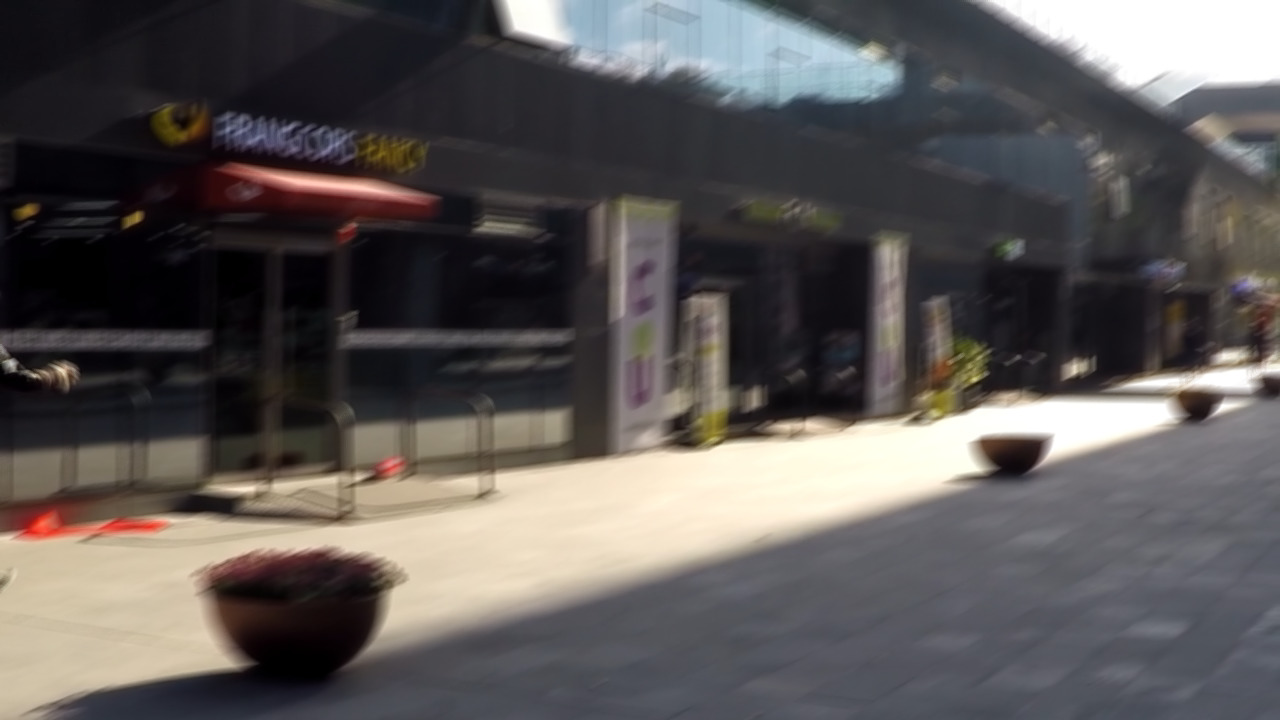

In [16]:
im

In [17]:
sh_im = Image.open(sharp_path+"000001.png")
print(im.size)

(1280, 720)


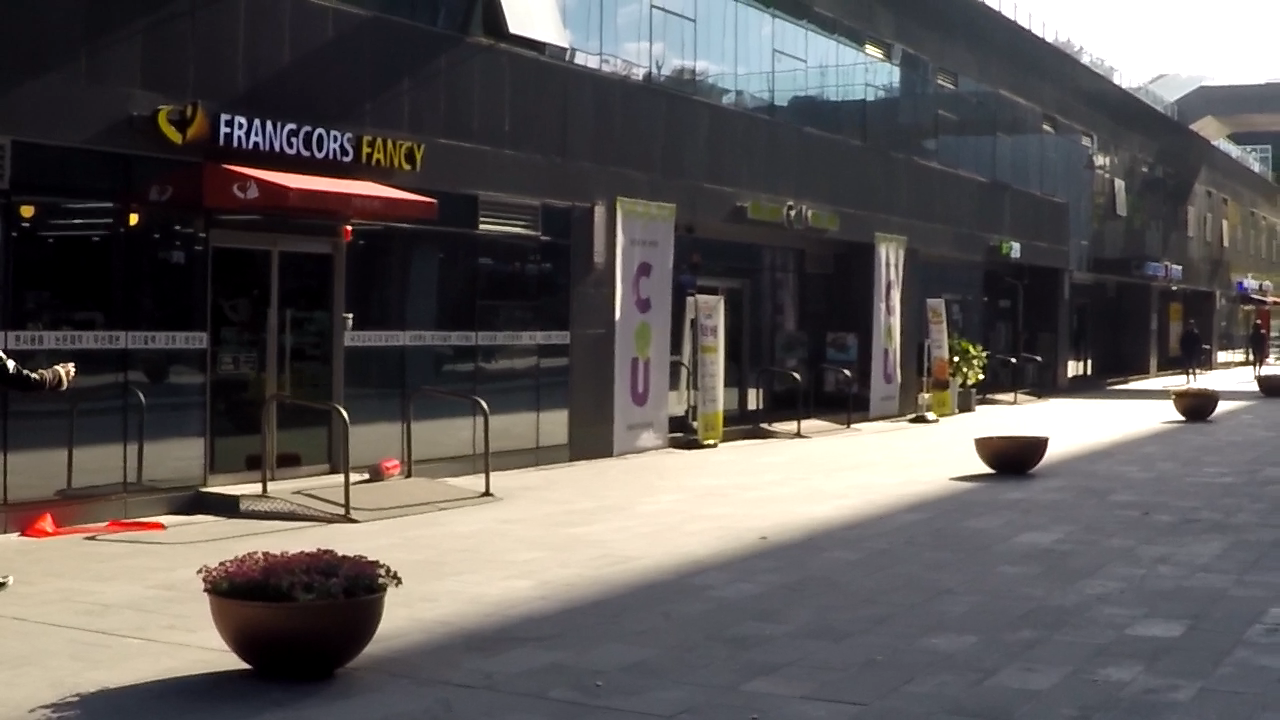

In [18]:
sh_im

## Reshape and crop image to 256x256 size

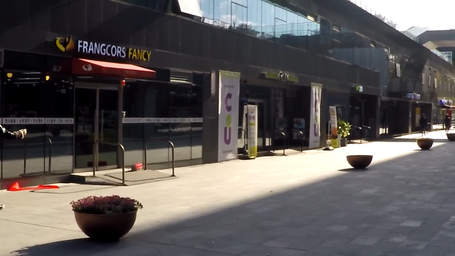

In [19]:
baseheight = 256
img = Image.open(sharp_path+"000001.png")
hpercent = (baseheight/float(img.size[1]))
wsize = int((float(img.size[0])*float(hpercent)))
img = img.resize((wsize, baseheight), Image.ANTIALIAS)
img

In [20]:
img.size

(455, 256)

In [21]:
c = img.crop((100, 0, 356, 256))
c.size

(256, 256)

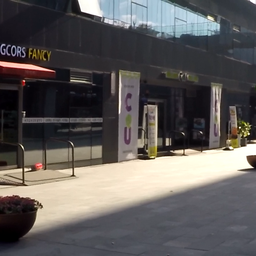

In [22]:
c

## Process the images and save it in lists

In [23]:
files=[]

from os import listdir
files = listdir(blur_path)

In [24]:
src_img = []
tar_img = []

In [25]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array

In [26]:
baseheight = 256
hpercent = (baseheight/float(img.size[1]))
wsize = int((float(img.size[0])*float(hpercent)))

def resize_image(img): 
  img = img.resize((wsize, baseheight), Image.ANTIALIAS)
  img = img.crop((100, 0, 356, 256))
  return img

In [27]:
print("Processing Blur images: ")
for i in tqdm(range(len(files))):
  img = Image.open(blur_path+files[i])
  img = resize_image(img)
  pixels = img_to_array(img)
  src_img.append(pixels)

  0%|          | 2/1029 [00:00<01:04, 15.84it/s]

Processing Blur images: 


100%|██████████| 1029/1029 [01:00<00:00, 17.05it/s]


In [28]:
print("Processing Sharp images: ")
for i in tqdm(range(len(files))):
  img = Image.open(sharp_path+files[i])
  img = resize_image(img)
  pixels = img_to_array(img)
  tar_img.append(pixels)

  0%|          | 2/1029 [00:00<01:05, 15.70it/s]

Processing Sharp images: 


100%|██████████| 1029/1029 [01:00<00:00, 17.05it/s]


## Change datatype from float32 to int8

In [31]:
from numpy import asarray

src_img = asarray(src_img, dtype="uint8")
tar_img = asarray(tar_img, dtype="uint8")

In [32]:
print(src_img.shape, tar_img.shape)

(1029, 256, 256, 3) (1029, 256, 256, 3)


## Compress the data and save it in blur.npz file

In [34]:
from numpy import savez_compressed

savez_compressed("blur.npz", src_img, tar_img)

In [37]:
!ls -lh

total 2.2G
drwxr-xr-x 3 root root 4.0K Mar 17 06:00 blur
-rw-r--r-- 1 root root 300M Mar 17 06:06 blur.npz
-rw-r--r-- 1 root root 2.0G Mar 17 06:00 gopro-deblur.zip
-rw-r--r-- 1 root root   68 Mar 17 05:59 kaggle.json
drwxr-xr-x 1 root root 4.0K Mar  5 14:37 sample_data


## Move the file to Google Drive for later use

In [38]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [39]:
!mkdir "gdrive/MyDrive/8th-Sem-Project"

In [42]:
!cp blur.npz "gdrive/MyDrive/8th-Sem-Project/blur.npz"